# Ted Talks

These data contain two files, one which gives some information about the Ted Talk presentation such as the main speaker's name, description of the talk, ratings, etc. The second file gives a transcipt of the talk. Data were downloaded from [here](https://www.kaggle.com/rounakbanik/ted-talks).  

In [1]:
library(dplyr)
library(tidytext)
library(readr)
library(stringr)
library(tidyr)
library(ggplot2)


library(tokenizers)

options(warn=-1)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [46]:
transcripts <- read_csv('../datasets/ted/transcripts.csv')
transcripts_data <- read_csv('../datasets/ted/ted_main.csv')

Parsed with column specification:
cols(
  transcript = col_character(),
  url = col_character()
)
Parsed with column specification:
cols(
  comments = col_integer(),
  description = col_character(),
  duration = col_integer(),
  event = col_character(),
  film_date = col_integer(),
  languages = col_integer(),
  main_speaker = col_character(),
  name = col_character(),
  num_speaker = col_integer(),
  published_date = col_integer(),
  ratings = col_character(),
  related_talks = col_character(),
  speaker_occupation = col_character(),
  tags = col_character(),
  title = col_character(),
  url = col_character(),
  views = col_integer()
)


In [47]:
#write.table(transcripts, file = "transcripts.csv", row.names = FALSE)
#write.table(transcripts_data, file = "ted_main.csv", row.names = FALSE)

## Activities to develop:

1. Figure out what the `<80><94>` means in the "head" section. And what the `\342\200\224` means in the "print" section.
1. Break the text into sentences, with one sentence per row.
1. Count (laughter) instances
1. Count (applause) instances
1. What is the relationship between the amount of laughter and a speaker's profession? Applause? 
1. Do sentiment analysis on each senetence. 
1. Build a histogram or other appropriate visualization to show the sentence by sentence change in sentiment throughout the talk. 
1. Build a bar chart of the 20 most used words in each talk. 
1. Do something cool based on the ideas that emerge from your own brains.


**Activity 1:** Figure out what the `<80><94>` means in the "head" section. And what the `\342\200\224` means in the "print" section.

**Activity 2:** Break the text into sentences, with one sentence per row.

In [3]:
transdata <- inner_join(transcripts, transcripts_data)

transdata <- transdata %>%
                        mutate(id=seq.int(nrow(transdata)))                 

transdata <- transdata %>% unnest_tokens(sentence, transcript, token = "sentences")

Joining, by = "url"


**Activity 3:** Count the total number of (Laughter) instances.

In [4]:
# Activity 3 code here
# -----------

transdata$numberLaughs <- str_count(transdata$sentence, "laughter")

**Activity 4:** And now count the (Applause) instances.

In [5]:
# Activity 4 code here
# -----------

transdata$numberApplause <- str_count(transdata$sentence, "applause")

**Activity 5:** What is the relationship between the amount of laughter and a speaker's profession? Applause?

In [6]:
t(head(transdata, 2))

url,https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship,https://www.ted.com/talks/9_11_healing_the_mothers_who_found_forgiveness_friendship
comments,149,149
description,"Phyllis Rodriguez and Aicha el-Wafi have a powerful friendship born of unthinkable loss. Rodriguez' son was killed in the World Trade Center attacks on September 11, 2001; el-Wafi's son Zacarias Moussaoui was convicted of a role in those attacks and is serving a life sentence. In hoping to find peace, these two moms have come to understand and respect one another.","Phyllis Rodriguez and Aicha el-Wafi have a powerful friendship born of unthinkable loss. Rodriguez' son was killed in the World Trade Center attacks on September 11, 2001; el-Wafi's son Zacarias Moussaoui was convicted of a role in those attacks and is serving a life sentence. In hoping to find peace, these two moms have come to understand and respect one another."
duration,594,594
event,TEDWomen 2010,TEDWomen 2010
film_date,1292112000,1292112000
languages,32,32
main_speaker,Aicha el-Wafi + Phyllis Rodriguez,Aicha el-Wafi + Phyllis Rodriguez
name,"Aicha el-Wafi + Phyllis Rodriguez: The mothers who found forgiveness, friendship","Aicha el-Wafi + Phyllis Rodriguez: The mothers who found forgiveness, friendship"
num_speaker,1,1
published_date,1304362260,1304362260


In [7]:
summary <- transdata %>%
                        group_by(speaker_occupation) %>%
                        summarise(numberSentences = n(), 
                                  numberLaughs = sum(numberLaughs),
                                  numberApplause = sum(numberApplause)
                                 ) %>%
                        mutate(laughRatio = numberLaughs/numberSentences, 
                               applauseRatio = numberApplause/numberSentences) %>%
                        filter(numberSentences >= 100)                

In [8]:
laughSummary <- summary %>%
                    arrange(-laughRatio) 

head(laughSummary, 10)

speaker_occupation,numberSentences,numberLaughs,numberApplause,laughRatio,applauseRatio
"Neuroscientist, stand-up comic",174,69,3,0.3965517,0.017241379
Satirist,192,59,14,0.3072917,0.072916667
Comedian and writer,335,100,25,0.2985075,0.074626866
"Comedian, voice artist",327,74,5,0.2262997,0.015290520
Comedian and Mental Health Activist,107,23,5,0.2149533,0.046728972
Moustache activist,136,28,4,0.2058824,0.029411765
"Humorist, web artist",407,83,12,0.2039312,0.029484029
Comedian,953,190,28,0.1993704,0.029380902
Math educator,103,20,3,0.1941748,0.029126214
Philosopher-comic,241,45,2,0.1867220,0.008298755


In [9]:
applauseSummary <- summary %>%
                    arrange(-applauseRatio) 

head(applauseSummary, 10)

speaker_occupation,numberSentences,numberLaughs,numberApplause,laughRatio,applauseRatio
Fiddler,109,16,17,0.146788991,0.15596330
Autonomous systems pioneer,185,8,25,0.043243243,0.13513514
Violinist,174,13,20,0.074712644,0.11494253
Guitarist,165,5,16,0.030303030,0.09696970
Change catalyst,219,6,19,0.027397260,0.08675799
Disrupter,138,3,11,0.021739130,0.07971014
High school principal,101,9,8,0.089108911,0.07920792
Dancer and Choreographer,236,2,18,0.008474576,0.07627119
Gun-control activist,120,2,9,0.016666667,0.07500000
Comedian and writer,335,100,25,0.298507463,0.07462687


**Activity 6:** Do sentiment analysis on each senetence. 

In [10]:
transdata$sentenceId <- seq.int(nrow(transdata))
sents <- get_sentiments("bing")
sents$sentiment2 <- ifelse(sents$sentiment == "positive", 1, -1)

sentenceScore <- transdata %>% 
            select(sentence, sentenceId) %>%
            unnest_tokens(word, sentence) %>%
            inner_join(sents) %>%
            group_by(sentenceId) %>%
            summarise(netScore = sum(sentiment2))

transdataSent <- left_join(transdata, sentenceScore, by = "sentenceId")
transdataSent$netScore <- ifelse(is.na(transdataSent$netScore), 0, transdataSent$netScore)
transdata <- transdataSent

Joining, by = "word"


**Activity 7:** Build a histogram or other appropriate visualization to show the sentence by sentence change in sentiment throughout the talk.

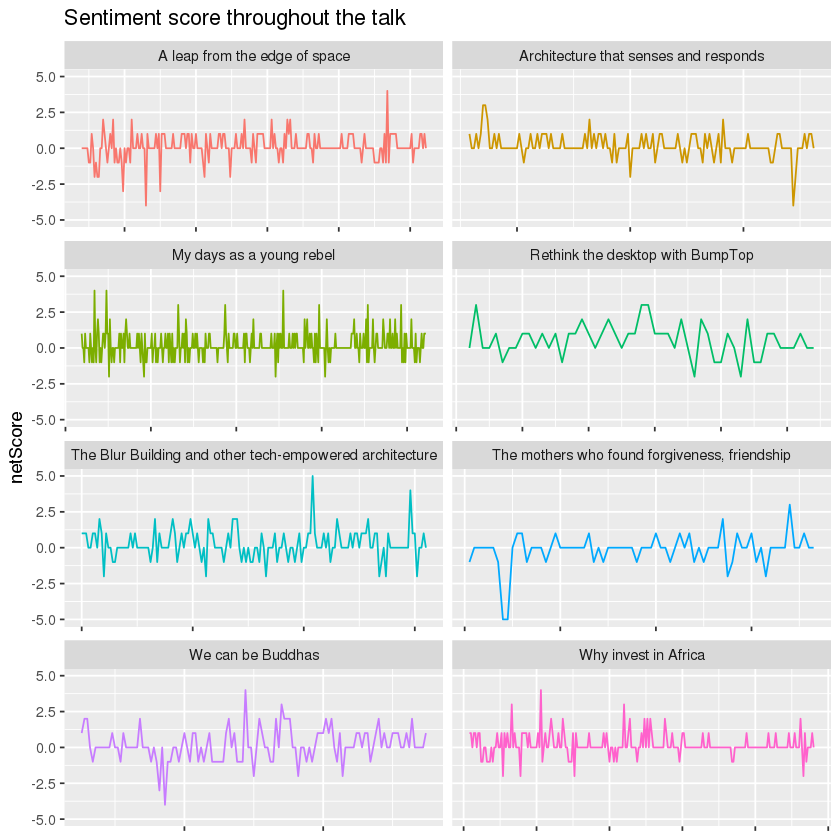

In [19]:
talk <- transdata %>%
            filter(id %in% c(890, 891, 200, 300, 500, 129, 111, 112)) %>%
            select(id, sentenceId, url, netScore, sentence, title)

ggplot(talk, aes(x = sentenceId, y = netScore, color = title)) + 
    geom_line(show.legend = FALSE) + facet_wrap(~title, ncol = 2, scales = "free_x") + 
    theme(axis.text.x=element_blank(), axis.title.x=element_blank()) + 
    labs(title = "Sentiment score throughout the talk")

**Activity 8:** Build a bar chart of the 20 most used words in each talk.

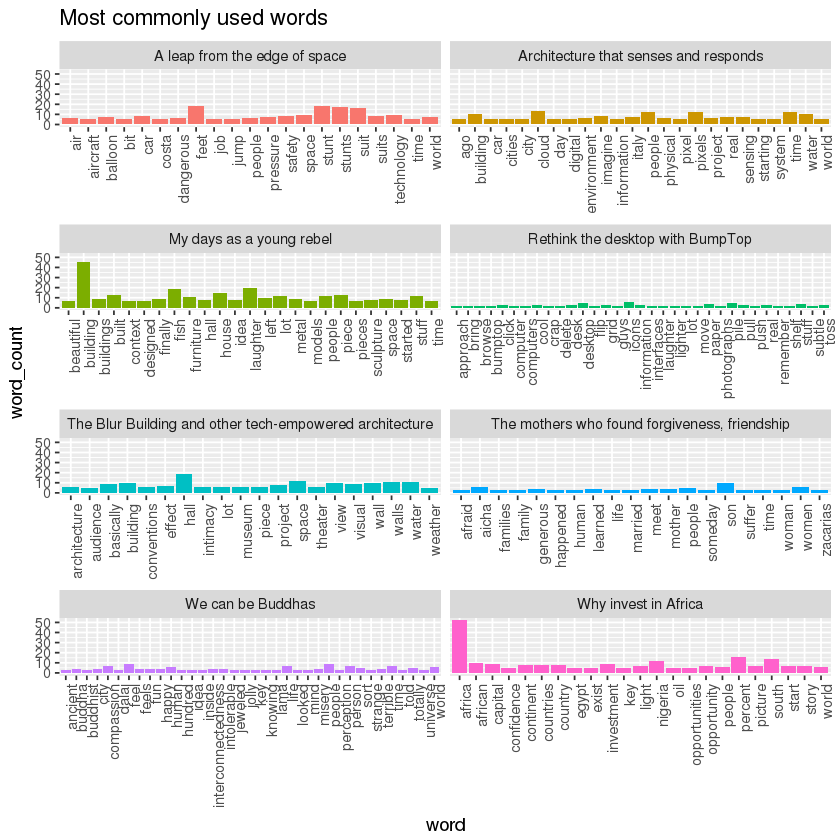

In [45]:
talks <- transdata %>%
            filter(id %in% c(890, 891, 200, 300, 500, 129, 111, 112)) %>%
            select(id, sentenceId, url, netScore, sentence, title)

sentenceCount <- talks %>% 
            select(id, title, sentence) %>%
            unnest_tokens(word, sentence) %>%
            anti_join(stop_words, by = c("word" = "word")) %>%
            group_by(id, title, word) %>%
            summarize(word_count = n()) %>%
            top_n(20, wt = word_count) %>%
            arrange(id, -word_count)

ggplot(sentenceCount, aes(x = word, y = word_count, fill = title)) + 
    geom_col(show.legend = FALSE) + facet_wrap(~title, ncol = 2, scales = "free_x") + 
    labs(title = "Most commonly used words") + 
    theme(axis.text.x=element_text(angle=90,hjust=1))

**Activity 9:** Do something cool based on the ideas that emerge from your own brains.


In [13]:
# Activity 9 code here
# -----------




